In [79]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import display, Math
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from mlxtend.frequent_patterns import apriori, association_rules

# Data Cleaning

In [41]:
realtor_data = pd.read_csv('realtor-data.zip.csv')
realtor_data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
realtor_data.shape

(2226382, 12)

In [7]:
column_names = realtor_data.columns.tolist()
column_names

['brokered_by',
 'status',
 'price',
 'bed',
 'bath',
 'acre_lot',
 'street',
 'city',
 'state',
 'zip_code',
 'house_size',
 'prev_sold_date']

In [9]:
realtor_data.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [11]:
realtor_data['status'] = realtor_data['status'].apply(lambda x: x.replace('_', ' '))
realtor_data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [13]:
realtor_data = realtor_data.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x))
realtor_data

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [43]:
data_missing = realtor_data.isnull().sum()
data_missing

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

# Cleaning

In [47]:
# Convert 'brokered_by' to string and fill missing values
realtor_data['brokered_by'] = realtor_data['brokered_by'].astype(str).fillna("Unknown")

In [55]:
# Fill missing price with median per city
realtor_data['price'] = realtor_data.groupby('city')['price'].transform(lambda x: x.fillna(x.median()))
realtor_data['price'] = realtor_data['price'].fillna(realtor_data['price'].median())  # If city is missing

In [51]:
# Fill missing bed and bath with median per city
realtor_data['bed'] = realtor_data.groupby('city')['bed'].transform(lambda x: x.fillna(x.median()))
realtor_data['bath'] = realtor_data.groupby('city')['bath'].transform(lambda x: x.fillna(x.median()))

In [57]:
# Fill acre_lot with median per city or 0
realtor_data['acre_lot'] = realtor_data.groupby('city')['acre_lot'].transform(lambda x: x.fillna(x.median()))
realtor_data['acre_lot'] = realtor_data['acre_lot'].fillna(0)  # Default to 0 if no data available

In [59]:
# Convert 'street' to string and fill missing values
realtor_data['street'] = realtor_data['street'].astype(str)
realtor_data.loc[realtor_data['street'] == 'nan', 'street'] = "Unknown"

In [61]:
# Drop rows where both city and state are missing
realtor_data = realtor_data.dropna(subset=['city', 'state'])

In [63]:
# Fill missing zip_code with most common zip per city
realtor_data['zip_code'] = realtor_data.groupby('city')['zip_code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [65]:
# Convert zip_code, bed, bath, house_size to int (after filling NaNs)
realtor_data[['zip_code', 'bed', 'bath', 'house_size']] = realtor_data[['zip_code', 'bed', 'bath', 'house_size']].fillna(0).astype(int)

In [67]:
# Fill missing house_size with median per city
realtor_data['house_size'] = realtor_data.groupby('city')['house_size'].transform(lambda x: x.fillna(x.median()))
realtor_data['house_size'] = realtor_data['house_size'].fillna(realtor_data['house_size'].median())

In [69]:
# Fill missing prev_sold_date with "Never Sold" and convert to datetime
realtor_data['prev_sold_date'] = realtor_data['prev_sold_date'].fillna("Never Sold")
realtor_data['prev_sold_date'] = pd.to_datetime(realtor_data['prev_sold_date'], errors='coerce')

C:\Users\sardo\AppData\Local\Temp\ipykernel_13196\4183090853.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [71]:
# Normalize text columns
realtor_data['status'] = realtor_data['status'].str.lower()
realtor_data['city'] = realtor_data['city'].str.lower()
realtor_data['state'] = realtor_data['state'].str.lower()

In [73]:
# Drop duplicates
realtor_data = realtor_data.drop_duplicates(subset=['street', 'city', 'state', 'price'], keep='first')

In [75]:
data_missing = realtor_data.isnull().sum()
data_missing

brokered_by            0
status                 0
price                  0
bed                    0
bath                   0
acre_lot               0
street                 0
city                   0
state                  0
zip_code               0
house_size             0
prev_sold_date    724953
dtype: int64

# EDA

## Unaviraite Analysis

In [87]:
## Summary

In [83]:
summary_stats = realtor_data.describe().T
summary_stats['missing_percent'] = (realtor_data.isnull().sum() / len(realtor_data)) * 100
summary_stats

,count,mean,min,25%,50%,75%,max,std,missing_percent
price,2093965.0,525263.014651,0.0,164900.0,325000.0,550000.0,2147483600.0,2194653.911944,0.000000
bed,2093965.0,3.223317,0.0,3.0,3.0,4.0,473.0,1.425735,0.000000
bath,2093965.0,2.424237,0.0,2.0,2.0,3.0,830.0,1.499798,0.000000
acre_lot,2093965.0,12.973629,0.0,0.15,0.25,0.76,100000.0,701.667956,0.000000
zip_code,2093965.0,51861.58614,0.0,29526.0,48045.0,77868.0,99999.0,28974.012408,0.000000
house_size,2093965.0,2042.013139,0.0,0.0,1440.0,2137.0,1040400400.0,719075.4654,0.000000
prev_sold_date,1369012,2017-03-20 00:49:47.621437696,1901-01-01 00:00:00,2015-08-31 00:00:00,2021-11-17 00:00:00,2022-02-15 00:00:00,2026-04-08 00:00:00,NaN,34.621066


## Log Transform to deal with distrbutions and data

In [91]:
import numpy as np

# Ensure only numeric columns are considered
numeric_cols = realtor_data.select_dtypes(include=['number']).columns

# Compute skewness only for numeric columns
skewed_cols = numeric_cols[realtor_data[numeric_cols].skew() > 2].tolist()

# Apply log transformation for highly skewed columns
realtor_data[skewed_cols] = realtor_data[skewed_cols].apply(lambda x: np.log1p(x))

print(f"Log-transformed columns: {skewed_cols}")


Log-transformed columns: ['price', 'bed', 'bath', 'acre_lot', 'house_size']


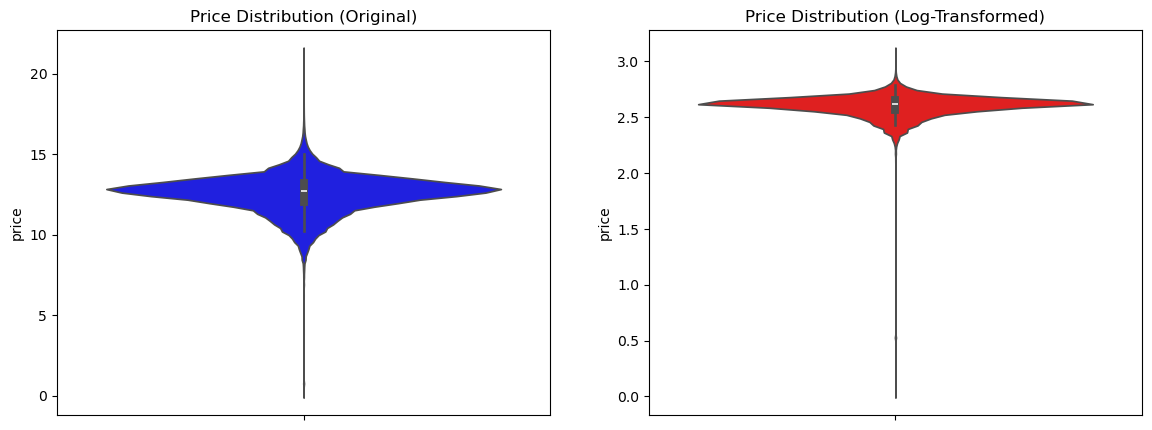

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before log transformation
sns.violinplot(y=realtor_data['price'], ax=axes[0], color='blue')
axes[0].set_title('Price Distribution (Original)')

# After log transformation
sns.violinplot(y=np.log1p(realtor_data['price']), ax=axes[1], color='red')
axes[1].set_title('Price Distribution (Log-Transformed)')

plt.show()

## Finding Outliers

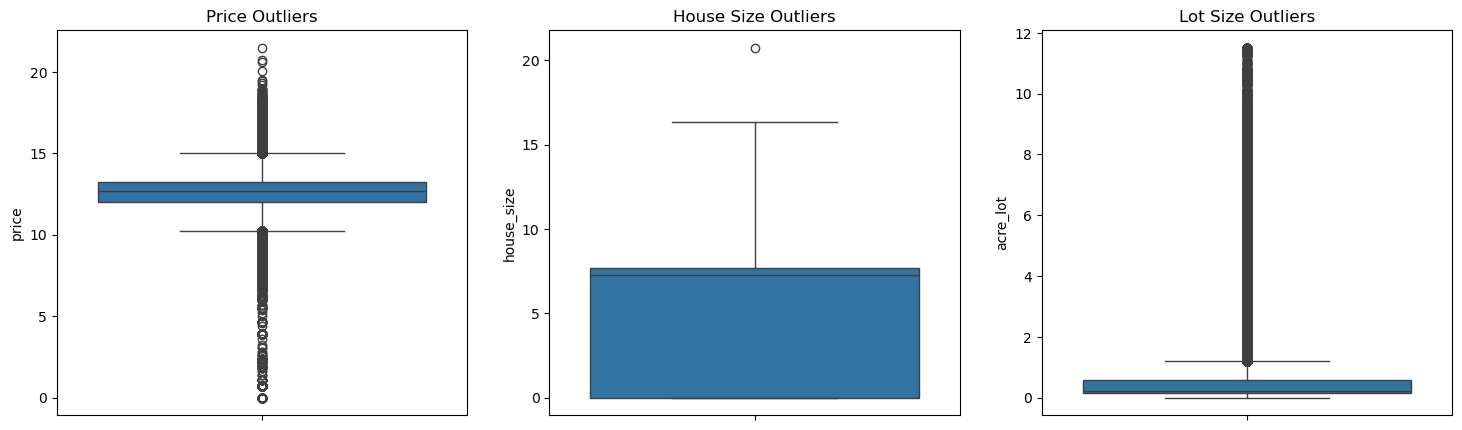

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=realtor_data['price'], ax=axes[0]).set_title('Price Outliers')
sns.boxplot(y=realtor_data['house_size'], ax=axes[1]).set_title('House Size Outliers')
sns.boxplot(y=realtor_data['acre_lot'], ax=axes[2]).set_title('Lot Size Outliers')

plt.show()

## Heatmap

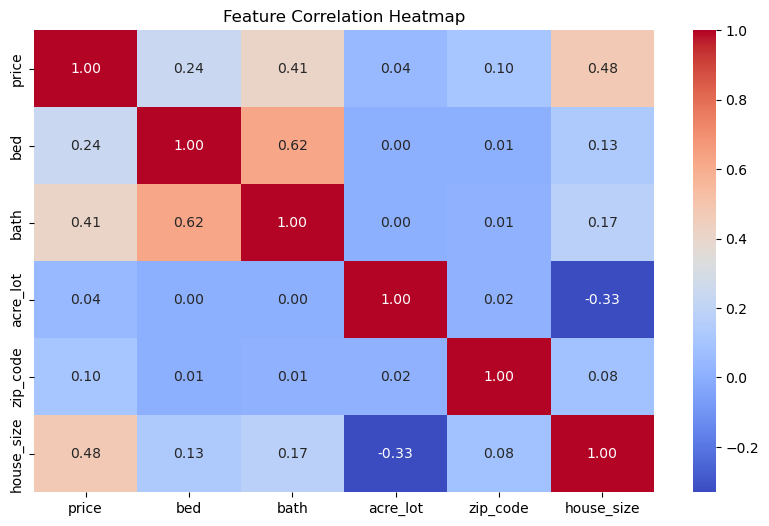

In [111]:

numeric_data = realtor_data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


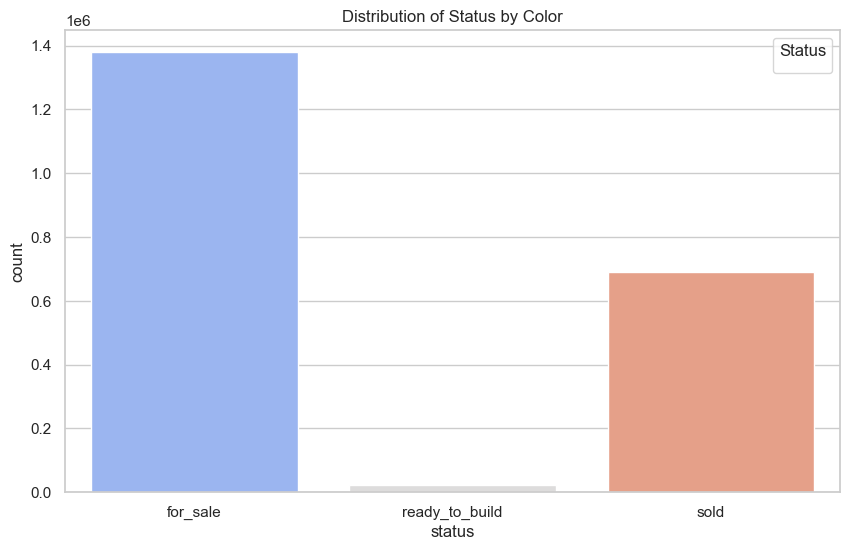

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=realtor_data, hue='status', palette='coolwarm')
plt.title("Distribution of Status by Color")
plt.legend(title="Status")
plt.show()


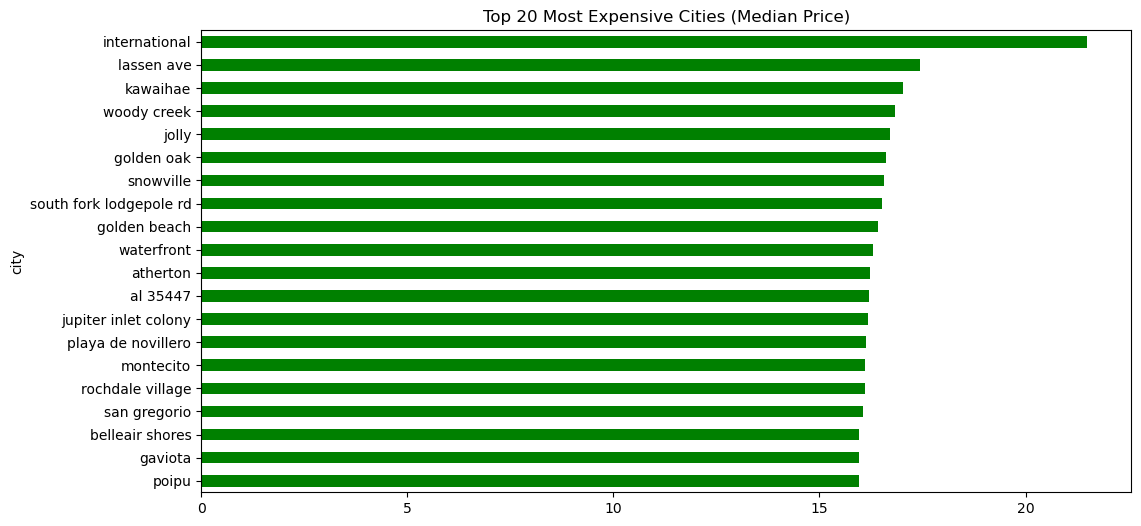

In [107]:
city_prices = realtor_data.groupby('city')['price'].median().sort_values()

plt.figure(figsize=(12, 6))
city_prices.tail(20).plot(kind='barh', color='green')  # Top 20 most expensive
plt.title("Top 20 Most Expensive Cities (Median Price)")
plt.show()
